Convert to Number to a given Base

In [49]:
#converts a number to a given base
def baseYconvert(number, base):
    
    # get quotient of division
    quot = number // base
    
    # get rest of division
    rest = number % base
    
    # update result reversely
    try:
        result = [rest] + result
    except NameError:
        result = [rest]
        
    # check wether quot is greater or equal to base, otherwise, implement recursively
    if (quot >= base):
        return baseYconvert(quot, base) + result
    else:
        return [quot] + result

Knapsack Problems

In [74]:
def yieldAllCombos(items):
    """
        Generates all combinations of N items into two bags, whereby each 
        item is in one or zero bags.

        Yields a tuple, (bag1, bag2), where each bag is represented as a list 
        of which item(s) are in each bag.
    """
    
    def baseYconvert(number, base):
    
        # get quotient of division
        quot = number // base
    
        # get rest of division
        rest = number % base
        
        # update result reversely
        try:
            result = [rest] + result
        except NameError:
            result = [rest]
        
        # check wether quot is greater or equal to base, otherwise, implement recursively
        if (quot >= base):
            return baseYconvert(quot, base) + result
        else:
            return [quot] + result
    
    ## main
    
    # get number of items
    N = len(items)
    
    result = []
    
    for i in range(3**N):
        
        # get a specific configuration
        arrange = (N - len(baseYconvert(i, 3)))*[0] + baseYconvert(i, 3)
        
        # initialize bag1 and bag2
        bag1 = []
        bag2 = []
        
        for n in range(N):
            
            # sort to the respective barg
            if(arrange[n] == 1):
                bag1.append(items[n])
            elif(arrange[n] == 2):
                bag2.append(items[n])
                
        yield (bag1, bag2)
        

Stochastic vs Deterministic

In [35]:
import random
        
def F():
    mylist = []
    r = 1

    if random.random() > 0.99:
        r = random.randint(1, 10)
    for i in range(r):
        random.seed(0)
        if random.randint(1, 10) > 3:
            number = random.randint(1, 10)
            if number not in mylist:
                mylist.append(number)
    print(mylist)

def G():  
    random.seed(0)
    mylist = []
    r = 1

    if random.random() > 0.99:
        r = random.randint(1, 10)
    for i in range(r):
        if random.randint(1, 10) > 3:
            number = random.randint(1, 10)
            mylist.append(number)
            print(mylist)

In [48]:
import random
mylist = []

for i in range(random.randint(1, 10)):
    random.seed(0)
    if random.randint(1, 10) > 3:
        number = random.randint(1, 10)
        mylist.append(number)
print(mylist)

[7]


Search Algorithms

In [62]:
def greedySum(L, s):
    """ input: s, positive integer, what the sum should add up to
               L, list of unique positive integers sorted in descending order
        Use the greedy approach where you find the largest multiplier for 
        the largest value in L then for the second largest, and so on to 
        solve the equation s = L[0]*m_0 + L[1]*m_1 + ... + L[n-1]*m_(n-1)
        return: the sum of the multipliers or "no solution" if greedy approach does 
                not yield a set of multipliers such that the equation sums to 's'
    """
    # dynamic sum
    acc = s

    # define multipliers
    multipliers = []

    for l in L:

        m = acc // l
        
        acc = acc % l

        multipliers.append(m)

    if(acc == 0):
        return sum(multipliers)
    else:
        return "no solution"

Graphs | Find Paths

In [75]:
import random
  
# You are given this function - do not modify
def createRandomGraph():
    """Creates a digraph with 7 randomly chosen integer nodes from 0 to 9 and
    randomly chosen directed edges (between 10 and 20 edges)
    """
    g = {}
    n = random.sample([0,1,2,3,4,5,6,7,8,9], 7)
    for i in n:
        g[i] = []
    edges = random.randint(10,20)
    count = 0
    while count < edges:
        a = random.choice(n)
        b = random.choice(n)
        if b not in g[a] and a != b:
            g[a].append(b)
            count += 1
    return g

# You are given this function - do not modify
def findPath(g, start, end, path=[]):
    """ Uses DFS to find a path between a start and an end node in g.
    If no path is found, returns None. If a path is found, returns the
    list of nodes """
    path = path + [start]
    if start == end:
        return path
    if not start in g:
        return None
    for node in g[start]:
        if node not in path:
            newpath = findPath(g, node, end, path)
            if newpath: return newpath
    return None
                
#########################        
## WRITE THIS FUNCTION ##
#########################        

def allReachable(g, n):
    """
    Assumes g is a directed graph and n a node in g.
    Returns a sorted list (increasing by node number) containing all 
    nodes m such that there is a path from n to m in g. 
    Does not include the node itself.
    """
    nodes = []
    for node in g:

        if(findPath(g, n, node, path=[]) == None):
            continue
        else:
            nodes.append(node)

    if(n in nodes):
        nodes.remove(n)

    return sorted(nodes)



In [65]:
g = createRandomGraph()

In [69]:
findPath(g, 4, 5, path=[])

[4, 2, 6, 7, 0, 5]

Random Walks | Drunks Codes

In [77]:
import pylab

class Location(object):
    def __init__(self, x, y):
        """x and y are floats"""
        self.x = x
        self.y = y
        
    def move(self, deltaX, deltaY):
        """deltaX and deltaY are floats"""
        return Location(self.x + deltaX, self.y + deltaY)
    
    def getX(self):
        return self.x
    
    def getY(self):
        return self.y
    
    def distFrom(self, other):
        ox = other.x
        oy = other.y
        xDist = self.x - ox
        yDist = self.y - oy
        return (xDist**2 + yDist**2)**0.5
    
    def __str__(self):
        return '<' + str(self.x) + ', ' + str(self.y) + '>'

class Field(object):
    def __init__(self):
        self.drunks = {}
        
    def addDrunk(self, drunk, loc):
        if drunk in self.drunks:
            raise ValueError('Duplicate drunk')
        else:
            self.drunks[drunk] = loc
            
    def moveDrunk(self, drunk):
        if not drunk in self.drunks:
            raise ValueError('Drunk not in field')
        xDist, yDist = drunk.takeStep()
        currentLocation = self.drunks[drunk]
        #use move method of Location to get new location
        self.drunks[drunk] = currentLocation.move(xDist, yDist)
        
    def getLoc(self, drunk):
        if not drunk in self.drunks:
            raise ValueError('Drunk not in field')
        return self.drunks[drunk]

import random

class Drunk(object):
    def __init__(self, name):
        self.name = name
    def __str__(self):
        return 'This drunk is named ' + self.name

class UsualDrunk(Drunk):
    def takeStep(self):
        stepChoices =\
            [(0.0,1.0), (0.0,-1.0), (1.0, 0.0), (-1.0, 0.0)]
        return random.choice(stepChoices)

class ColdDrunk(Drunk):
    def takeStep(self):
        stepChoices =\
            [(0.0,0.9), (0.0,-1.03), (1.03, 0.0), (-1.03, 0.0)]
        return random.choice(stepChoices)

class EDrunk(Drunk):
    def takeStep(self):
        ang = 2 * math.pi * random.random()
        length = 0.5 + 0.5 * random.random()
        return (length * math.sin(ang), length * math.cos(ang))

class PhotoDrunk(Drunk):
    def takeStep(self):
        stepChoices =\
                    [(0.0, 0.5),(0.0, -0.5),
                     (1.5, 0.0),(-1.5, 0.0)]
        return random.choice(stepChoices)

class DDrunk(Drunk):
    def takeStep(self):
        stepChoices =\
                    [(0.85, 0.85), (-0.85, -0.85),
                     (-0.56, 0.56), (0.56, -0.56)] 
        return random.choice(stepChoices)

def walkVector(f, d, numSteps):
    start = f.getLoc(d)
    for s in range(numSteps):
        f.moveDrunk(d)
    return(f.getLoc(d).getX() - start.getX(),
           f.getLoc(d).getY() - start.getY())

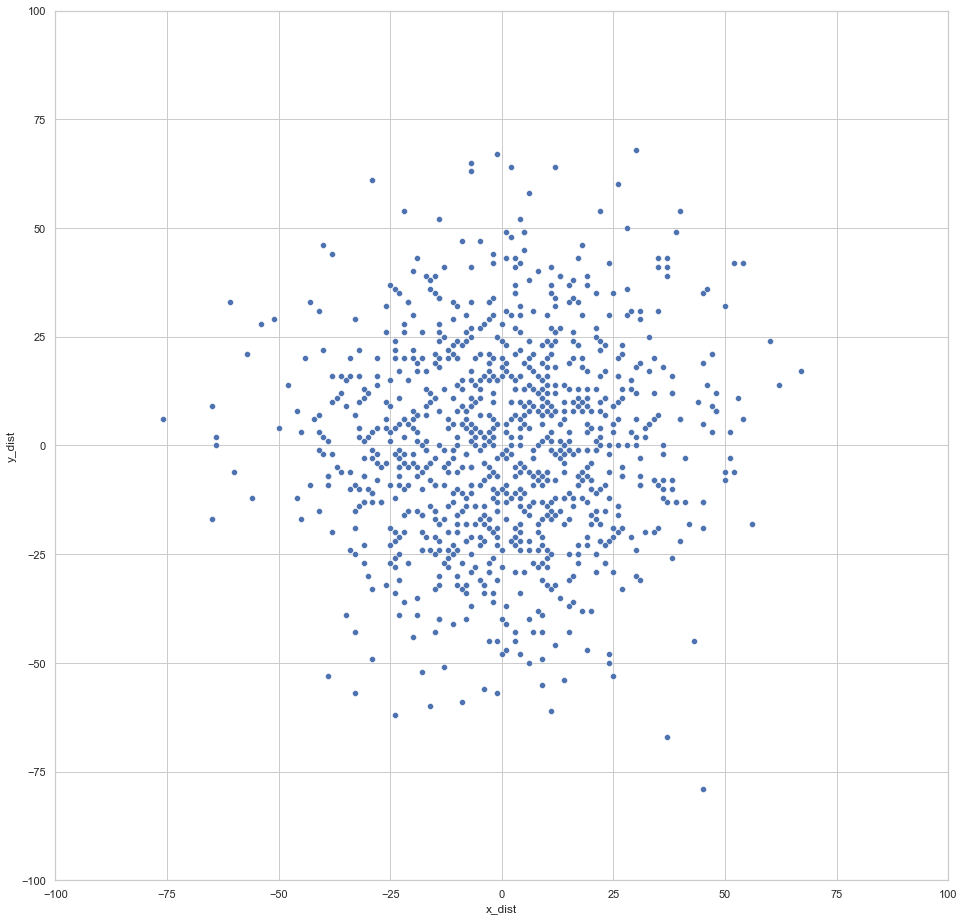

In [107]:
import pandas as pd
# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

dd = Drunk('Homer')
simdd = UsualDrunk(dd)
#simdd = UsualDrunk(dd)
#simdd = ColdDrunk(dd)
#simdd = PhotoDrunk(dd)
#simdd = EDrunk(dd)
#simdd = DDrunk(dd)

loc = Location(0,0)

field = Field()

field.addDrunk(simdd, loc)

lines = []
for i in range(1000):
    lines.append(walkVector(f=field, d=simdd, numSteps=1000))

result = pd.DataFrame(lines, columns = ['x_dist', 'y_dist'])

## GRAPH

plt.figure(figsize = (16,16))
sns.set_theme(style="whitegrid")

fg01 = sns.scatterplot(data = result,
                       x = 'x_dist', 
                       y = 'y_dist')

plt.ylim(-100, 100)
plt.xlim(-100, 100)
                                                                                     
plt.show(fg01)


Standard Deviation

In [113]:
def stdDevOfLengths(L):
    """
    L: a list of strings

    returns: float, the standard deviation of the lengths of the strings,
      or NaN if L is empty.
    """

    if(len(L) == 0):
        return float('NaN')

    lstr = []
    for l in L:
        lstr.append(len(l))

    m = sum(lstr) / len(lstr)

    tot = 0
    for j in lstr:

        tot += (m-j)**2

    std = (tot / len(lstr))**0.5

    return std   


In [114]:
stdDevOfLengths(['apples', 'oranges', 'kiwis', 'pineapples'])

1.8708286933869707

In [115]:
stdDevOfLengths(['a', 'z', 'p'])

0.0

In [21]:
def noReplacementSimulation(numTrials):
    '''
    Runs numTrials trials of a Monte Carlo simulation
    of drawing 3 balls out of a bucket containing
    3 red and 3 green balls. Balls are not replaced once
    drawn. Returns the a decimal - the fraction of times 3 
    balls of the same color were drawn.
    '''

    import random
    
    trials = []
    for nn in range(numTrials):
        bucket = [0, 0, 0, 1, 1, 1]
        res = []
        for n in range(3):
            pos = random.randint(0,5-n)
            res.append(bucket[pos])
            bucket.pop(pos)

        if((sum(res) == 3) | (sum(res) == 0)):
            trials.append(1)
        else:
            trials.append(0)

    return sum(trials) / numTrials


In [22]:
numTrials = [1,5,10,50,100,500,1000,5000,10000,50000,100000]
percents = []
for nt in numTrials:
    percents.append(noReplacementSimulation(nt))

In [24]:
len(percents)

11

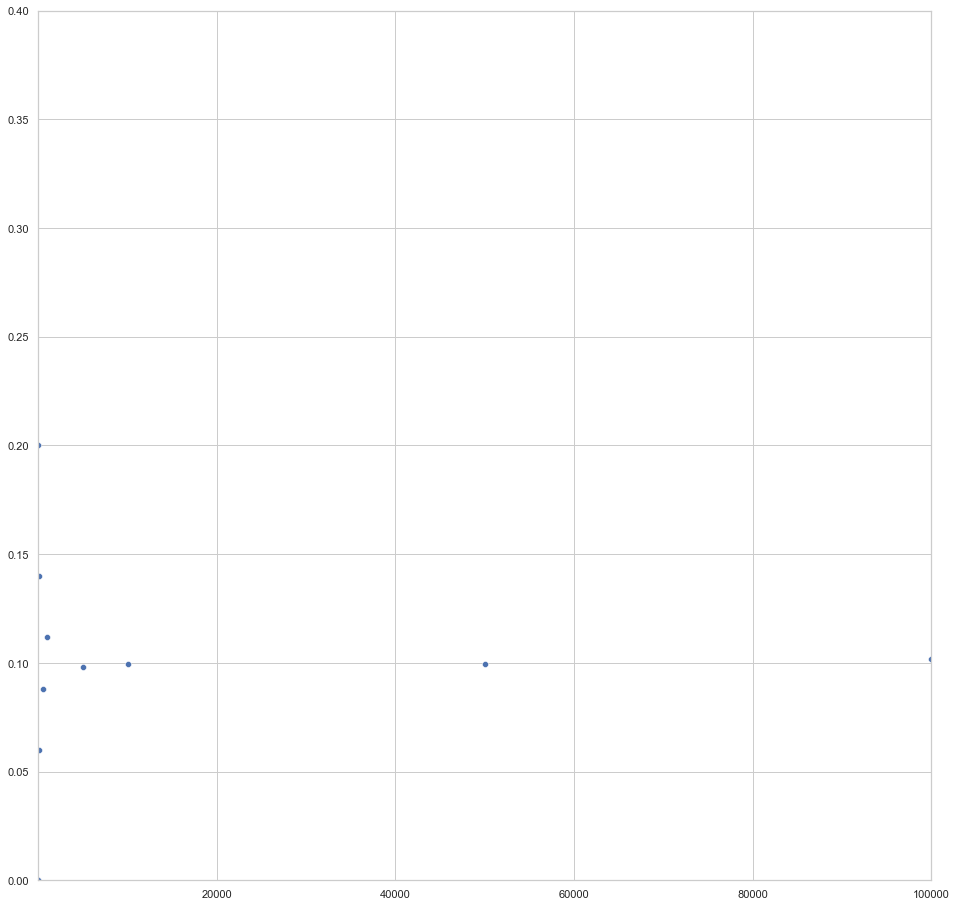

In [26]:
import pandas as pd
# Plotting
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize = (16,16))
sns.set_theme(style="whitegrid")

fg01 = sns.scatterplot(x = numTrials, 
                       y = percents)

plt.ylim(0, 0.4)
plt.xlim(1, 100000)
                                                                                     
plt.show(fg01)